In [43]:
from torchvision import datasets, transforms
from torch.utils import data

In [44]:
train_loader = data.DataLoader(
    datasets.FashionMNIST('dataset/', train=True, download=True,
                         transform=transforms.Compose([
                             #증폭 추가
                             transforms.RandomHorizontalFlip(),
                             transforms.ToTensor(),
                             transforms.Normalize(mean=(0.5,), std=(0.5,))
                         ])
                         ),
    batch_size=32
)
                          


In [45]:
test_loader = data.DataLoader(
    datasets.FashionMNIST('dataset/', train=False, download=True,
                         transform=transforms.Compose([
                             #증폭 추가
                             transforms.RandomHorizontalFlip(),
                             transforms.ToTensor(),
                             transforms.Normalize(mean=(0.5,), std=(0.5,))
                         ])
                         ),
    batch_size=32
)
                

In [46]:
len(train_loader), len(test_loader) #배치사이즈 32여서 각 길이에 * 32 해주면 됨
# 대충 6만개 1만개해서 7만개 -> 잘 했음

(1875, 313)

In [47]:
images, labels = next(iter(train_loader))
images.shape #4개의 값 , batch_size, channel, height, width -> 넓이

torch.Size([32, 1, 28, 28])

In [48]:
labels.shape

torch.Size([32])

In [49]:
images[0].shape

torch.Size([1, 28, 28])

In [50]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
import torch
torch_image = torch.squeeze(images[0]) #1을 제거 후 28,28 로 시각화를 해보기 위해 squeeze()함수 사용
torch_image.shape

torch.Size([28, 28])

In [52]:
torch_image.numpy()

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [53]:
import os # kernel error 발생 시 추가
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

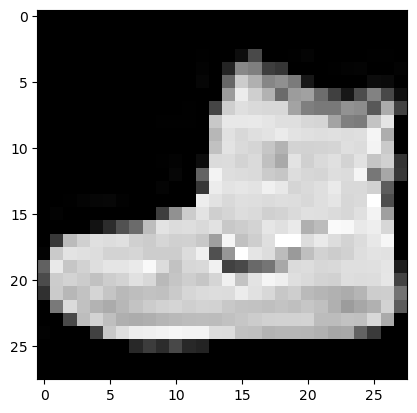

In [54]:
plt.imshow(torch_image.numpy(), 'gray')
plt.show()

In [55]:
labels[0]

tensor(9)

In [56]:
# input layer in
# hidden layer in-out (FC)
# output layer out

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f

In [58]:
torch.manual_seed(14)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
                    

In [59]:
#모델 정의는 클래스로
class Ann(nn.Module):
    def __init__(self, dropout=0.2):
        super(Ann, self).__init__()
        #레이어 구현
        self.fc1 = nn.Linear(784,256) # in - 28 X 28 data, out - 256
        self.fc2 = nn.Linear(256,128) # hidden layer
        self.fc3 = nn.Linear(128,10) # ouptut layer
        #Dropout 추가
        self.dropout = dropout
        
    def forward(self, x): #정방향 연산
        x = x.view(-1,784)
        x = f.relu(self.fc1(x)) # 활성화 함수, input
        x = f.relu(self.fc2(x)) # hidden
        #활성화 함수 뒤에 드랍아웃 추가
        x = f.dropout(x, training=self.training, p=self.dropout) #f 안에 있는 함수임
        
        x = self.fc3(x) # output layer
        return x


In [60]:
model = Ann().to(device) #내가 설정한 device로 값 전달

In [61]:
optimizer = optim.SGD(model.parameters(), lr=0.01) #lr = learning rate

In [62]:
#학습 모드 지정
model.train() #모델을 학습모드로 변환

Ann(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [63]:
data, target = images.to(device), labels.to(device)
data.shape, target.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [64]:
optimizer.zero_grad() #기울기 초기화

In [65]:
output = model(data)

In [66]:
loss = f.cross_entropy(output, target) # 예측해야할 값이 2개면 binary_entropy()

In [67]:
loss.backward() #기울기를 구함 역연산

In [68]:
optimizer.step()

In [69]:
#PyTorch모델 구조
#ANN 모델 구조로 제작 
#CPU로 값 전달, 최적화 알고리즘은 SGD사용 
#에포크 지정, 학습모드 설정, 배치 사이즈 단위로 학습, 데이터 메모리 전송, 실젯값과 예측값 오차 계산, 기울기 연산
#기울기 초기화, 모델의 예측값 연산, 최적화 알고리즘을 통해 가중치 수정


In [70]:
EPOCHS = 10

In [71]:
model = Ann().to(device)

In [72]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [73]:
for epoch in range(1, EPOCHS+1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, tarage = data.to(device), target.to(device) #학습 데이터를 device 메모리로 전달
        optimizer.zero_grad() #기울기 초기화
        output = model(data) #output은 모델의 예측값
        loss = f.cross_entropy(output, target) #예측값과 실제값의 오차 계산
        loss.backward() #기울기 계산
        optimizer.step() #최적화 알고리즘으로 가중치 수정
    print(f"Train Epoch : {epoch} \t Loss : {loss.item()}") #학습을 하면 할 수록 오차가 줄어드는 것을 볼 수 있음

Train Epoch : 1 	 Loss : 0.7042257189750671
Train Epoch : 2 	 Loss : 0.6161758303642273
Train Epoch : 3 	 Loss : 0.5466352105140686
Train Epoch : 4 	 Loss : 0.5019764304161072


KeyboardInterrupt: 

In [74]:
#ANN 성능평가
#모델 평가 구현
#평가 결과 출력 및 loss율 확인 -> 에포크에 따른 loss율 변화

#모델은 새로 만들거임 안그러면 학습된 모델 계속 사용됨!
EPOCHS = 30
model = Ann(dropout=0.2).to(device) #dropout 값으로 0.2가 국룰 제일 많이 씀!
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [75]:
train_history = []
test_history = [] # 학습, 평가 데이터들의 로스 히스토리
for epoch in range(1, EPOCHS+1):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, tarage = data.to(device), target.to(device) #학습 데이터를 device 메모리로 전달
        optimizer.zero_grad() #기울기 초기화
        output = model(data) #output은 모델의 예측값
        loss = f.cross_entropy(output, target) #예측값과 실제값의 오차 계산
        loss.backward() #기울기 계산
        optimizer.step() #최적화 알고리즘으로 가중치 수정
    print(f"Train Epoch : {epoch} \t Loss : {loss.item()}") #학습을 하면 할 수록 오차가 줄어드는 것을 볼 수 있음
    train_history.append(loss.item())
    
    model.eval() #검증 모드 validation
    test_loss = 0
    correct = 0
    
    with torch.no_grad(): #검증 할 때는기울기 계산할 필요 없음
        for data, target in test_loader: #테스트 데이터만큼 반복
            data, target = data.to(device), target.to(device) #데이터 device 메모리로 전달
            output = model(data) #모델의 예측값
            test_loss += f.cross_entropy(output, target, reduction='sum').item() #모든 오차의 합 계산
            pred = output.argmax(dim=1, keepdim=True) #차원, 차원유지 옵션 , #가장 큰 값이 모델의 예측값
            correct += pred.eq(target.view_as(pred)).sum().item() #예측값과 실제값이 같은 경우 1 더함
            #반복이 끝나면 correct는 정답을 맞춘 갯수
            
    test_loss /= len(test_loader.dataset)
    test_history.append(test_loss) #여기까지  평가단계
    
    print(f"Test set : Average Loss {test_loss}, Accuracy : {correct/len(test_loader.dataset)*100}") #백분율로 정확도 출력

Train Epoch : 1 	 Loss : 0.7010625600814819
Test set : Average Loss 0.5976756726264953, Accuracy : 78.93
Train Epoch : 2 	 Loss : 0.500709056854248
Test set : Average Loss 0.5144268675804138, Accuracy : 81.54
Train Epoch : 3 	 Loss : 0.46396684646606445
Test set : Average Loss 0.47724523549079895, Accuracy : 82.89999999999999
Train Epoch : 4 	 Loss : 0.4445422887802124
Test set : Average Loss 0.44875427465438844, Accuracy : 83.84
Train Epoch : 5 	 Loss : 0.3668469190597534
Test set : Average Loss 0.43175197179317476, Accuracy : 84.48
Train Epoch : 6 	 Loss : 0.36921563744544983
Test set : Average Loss 0.41875088205337524, Accuracy : 84.72
Train Epoch : 7 	 Loss : 0.33310621976852417
Test set : Average Loss 0.4063181087017059, Accuracy : 85.47
Train Epoch : 8 	 Loss : 0.27480512857437134
Test set : Average Loss 0.39930114841461184, Accuracy : 85.69
Train Epoch : 9 	 Loss : 0.26016947627067566
Test set : Average Loss 0.39147331261634827, Accuracy : 85.97
Train Epoch : 10 	 Loss : 0.28042

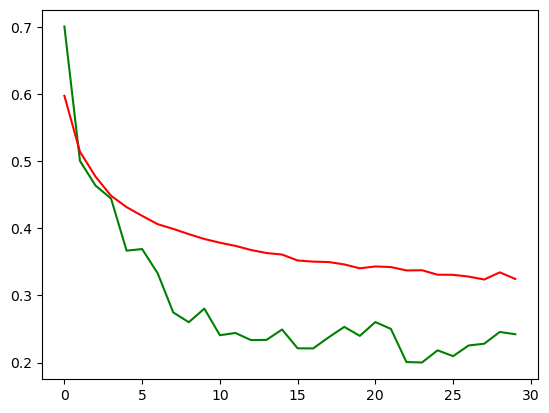

In [76]:
import matplotlib.pyplot as plt
plt.plot(train_history, c='g') #학습 데이터 로스율 감소 추이
plt.plot(test_history, c='r') #새로운 데이터를 학습할 때 로스율 감소 추이
plt.show()

In [ ]:
#ANN 성능 개선!
#과적합(over fitting) : 학습 데이터와 평가 데이터의 균형이 안맞는 현상
# 학습 데이터에만 잘 맞고, 평가 데이터는 잘 안맞음 -> 과적합
# 학습이 제대로 이루어지지 않아 학습 데이터에서 성능이 낮고, 평가가 더 높음 -> 과소적합

#과적합 해결 방법
# 데이터 정규화(Normalize) : 평균과 표준편차 값을 지정해서 정규화
# Dropout(자주 사용) : 신경망의 일부를 사용하지 않음, 개별 뉴런의 연산결과에 가중치가 고정되는 현상 방지
#   신경망의 뉴런 몇개를 내보낸다는 의미
# 데이터 더 모으기 : 데이터를 일부 변형해서 개수 증가! (증폭시킴) 